In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

#샘플생성
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
#이전까지의 X-trrain, y_train정도 형식

In [3]:
train_images.shape #이미지의 수

(60000, 28, 28)

In [4]:
train_labels.shape #이미지에 넘버링 한 갯수의 형태

(60000,)

In [5]:
test_images.shape #지정된 test데이터

(10000, 28, 28)

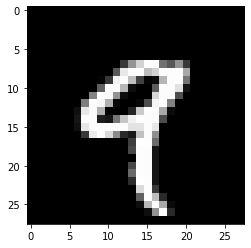

In [6]:
digit = train_images[4]

plt.imshow(digit, cmap='gray')  #학습데이터 4번의 이미지확인

In [7]:
print(train_labels[4]) #학습데이터중 4로 넘버링 된 데이터 출력

9


In [8]:
from keras import models
from keras import layers

#신경망생성 순차적 진행명령 코드sequential()
network = models.Sequential()
#네트워크라는 변수로 저장
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #인풋오타

# add() 네트워크라는 변수에 신경망 추가
##신경망추가명령 layers.Dense=덴스레이어추가(512=뉴런수,activation활성함수='relu', 
##이 활성함수로 들어오는 입력값=imput_shape= 입력모양=(28*28, 콤마= 한차원이 더있음을 알림)))

network.add(layers.Dense(10, activation='softmax'))

#activation='relu= d에서 시작하는 상승곡선 그래프
#activation='softmax'1을기준으로 총합이 1이 되도록 각각의 확률을 계산하는 함수


In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])#네트워크, 컴파일, 쉼표 오탈자
#네트워크 컴파일='신경망을 완성시킨다' 선언문
#loss='categorical_crossentropy',=여러개중 진짜하나를 맞추는 확률을 출력

In [10]:
#신경망에 맞게 이미지를 바꿔줌
train_images = train_images.reshape(60000, 28 * 28 )
#reshape=넘파이에서 자료의 구조를 바꿀때 사용 6만,28,28-> 6만,28*28 로 구조변경 셀을 784개 짜리의1차원이미지로 만듬 이 데이터가 6만개
train_images.shape

(60000, 784)

In [11]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
# dtype=uint8=정수형데이터의 계산을 용이하게 하기 위해 실수형으로 바꿈
train_images = train_images.astype('float32') / 255
#astype=타입 바꾸는 명령어('float32'=실수형32비트)/255으로 나눔

In [13]:
train_images #바뀐타입 확인. 보통 딥러닝에서는 정수를 실수형으로 변형후 연산함

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
test_images = test_images.reshape(10000,28*28)
 #테스트데이터가 만개밖에없으니 만개로 값을 넣음
test_images = test_images.astype('float32') /255

In [15]:
#이미지 데이터의 '9'라는 것이 [숫자]가 아닌 [분류]라고 명확히 알려줘야함

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#데이터셋팅 끝. 신경망 만들었고 학습만 시키면됌
#테스트 이미지 오류=원인: 위에서 test지정안함

# *테스트라벨 에러=<p>
트레인 이미지, 테스트 이미지 설정에서 오류로 추정됌.<p>
에러발생시. 헤딩부분 점검필요

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 26s 52ms/step - loss: 0.2569 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 27s 58ms/step - loss: 0.1037 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 29s 62ms/step - loss: 0.0682 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 33s 71ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 21s 46ms/step - loss: 0.0374 - accuracy: 0.9887


In [17]:
#결과해석= 에포크수만큼 학습돌림. 손실값이 점점 줄어듦. 
# #옵티마이저의rmsprop가 돌리면서 줄려줌
# loss=분류에서 다수분류경우 카테고리컬크로스앤트로피를 가장 많이 사용, 
# 둘중하하나 바이너리_크로스앤트로피로 판별
# in sckit_learn에서 둘중하나를 판별하는 알고리즘과 셋 이상을 판별하는 알고리즘이 다름

#윗 결과 평가
test_loss, test_acc = network.evaluate(test_images, test_labels) #lables 오타

313/313 [==============================] - 3s 8ms/step - loss: 0.0689 - accuracy: 0.9800


In [18]:
print('test_acc:',test_acc)

test_acc: 0.9800000190734863


----------------------------------끝